### Work done for the rebuttal

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tqdm")

import logging
logging.getLogger('rpy2').setLevel(logging.WARNING)

# Importing dependencies
%load_ext autoreload
%autoreload 2
import itertools
import yaml
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from clustercausal.experiments.ExperimentRunner import ExperimentRunner
from clustercausal.utils.Utils import *
from clustercausal.experiments.Utils import load_experiment_folder

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
data_clusterpc_1 = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\data_clusterPC_simulation_1.pkl')
data_clusterpc_2 = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\data_clusterPC_simulation_2.pkl')
data_clusterfci = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\data_clusterFCI_simulation.pkl')

In [4]:
prec_recall_metrics = ['base_adj_precision', 'cluster_adj_precision', \
              'base_adj_recall', 'cluster_adj_recall', \
                'base_adj_f1_score', 'cluster_adj_f1_score']
indep_test_metrics = ['Base indep tests', 'C-PC indep tests']
dist_metrics = ['base_base_shd', 'cluster_cluster_shd', 'empty_graph_shd']
overall_metrics = prec_recall_metrics + dist_metrics + indep_test_metrics

         Base indep tests  C-PC indep tests  ratio
n_edges                                           
15.0               1136.0             659.0   0.58
30.0               2998.0            1875.0   0.63
50.0               5228.0            3262.0   0.62
80.0               7181.0            4409.0   0.61
150.0              8362.0            5107.0   0.61


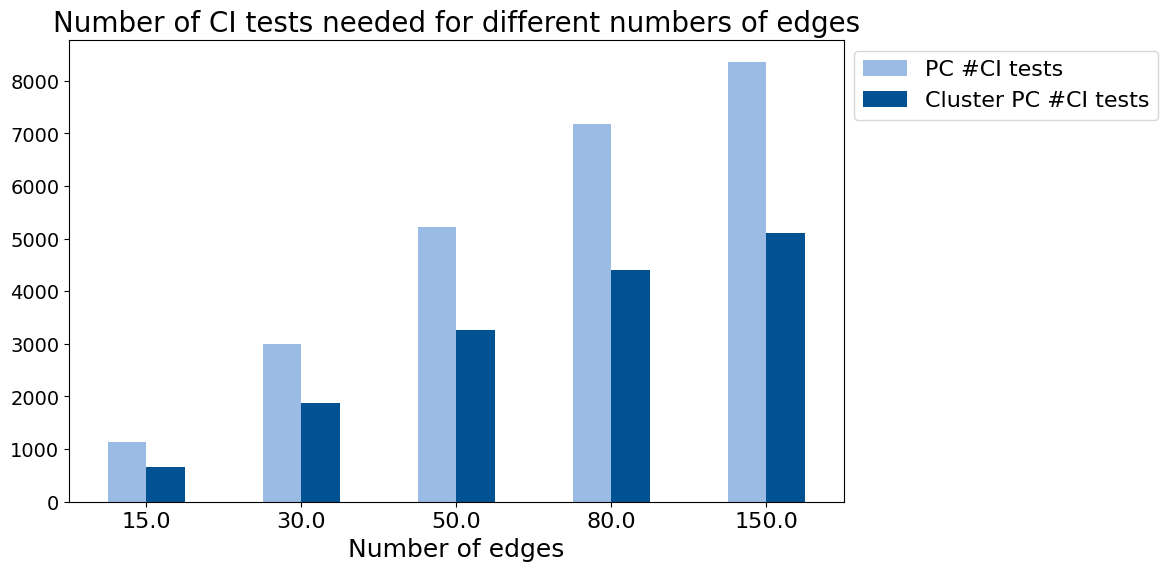

In [26]:
data_all = data_clusterpc_1
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data_all.groupby('n_edges')[indep_test_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('Number of CI tests needed for different numbers of edges', fontsize = 20)
plt.xlabel('Number of edges', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC #CI tests', 'Cluster PC #CI tests']
plt.legend(label_names, bbox_to_anchor = (1.42, 1),  fontsize=16, loc='upper right')
plt.savefig('imgs/ci_tests_clusters_diagram.pdf', bbox_inches='tight')
with_ratio = data_all.groupby('n_edges')[indep_test_metrics].mean().round(0)
with_ratio['ratio'] = with_ratio['C-PC indep tests'] / with_ratio['Base indep tests']
print(with_ratio.round(2))

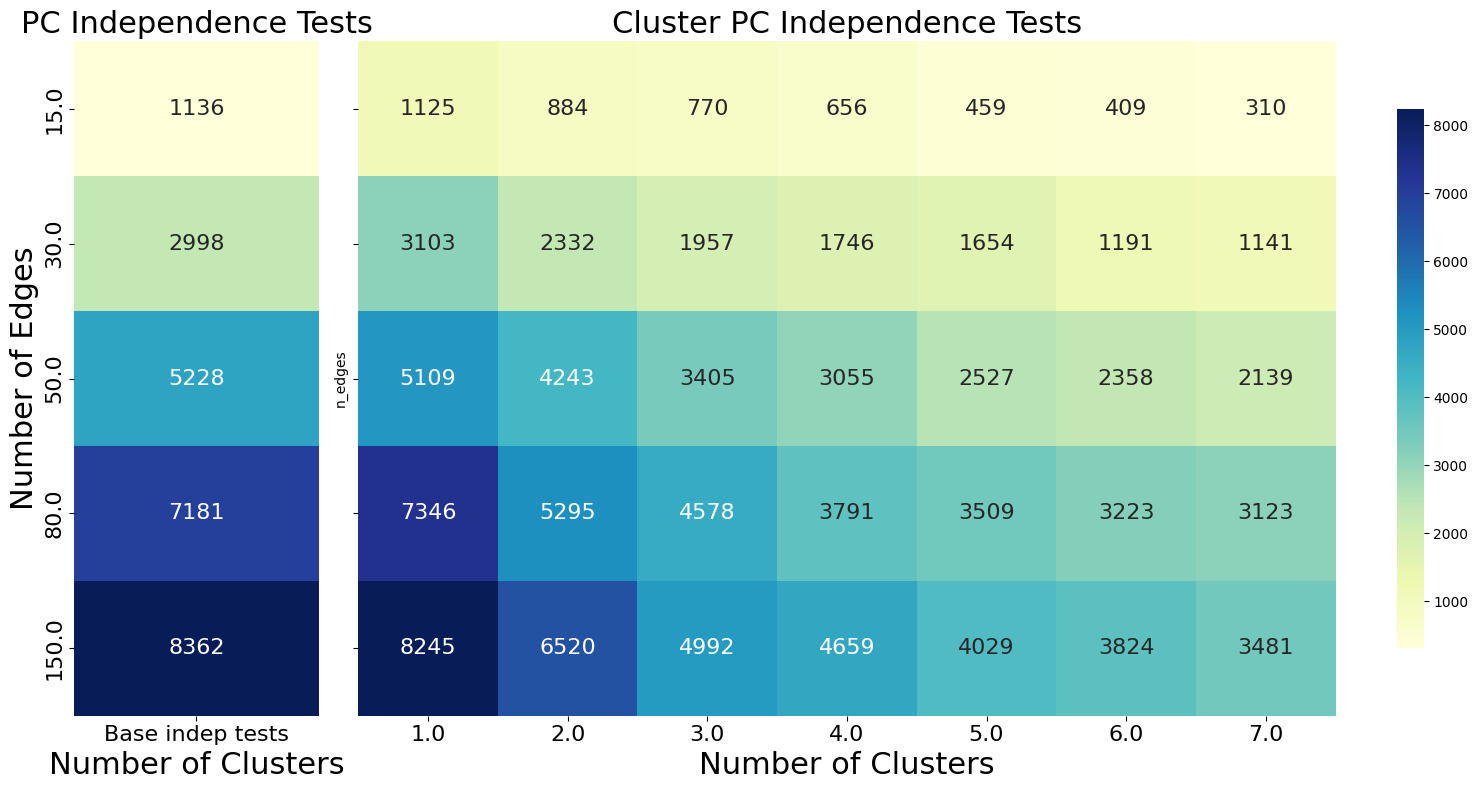

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by and calculate the mean for all metrics
grouped_data = data_all.groupby(['n_edges', 'n_clusters'])[indep_test_metrics].mean().reset_index()

# Separate metrics: Adjust these based on how you distinguish "base" and "C-PC" metrics
base_metric = 'Base indep tests'    # Replace with your base test metric name
cpc_metric = 'C-PC indep tests'     # Replace with your C-PC test metric name

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 5]}, sharey=True)

# Heatmap for Base Independence Tests
heatmap_data_base = pd.DataFrame(grouped_data.groupby(['n_edges'])[indep_test_metrics].mean().reset_index().set_index('n_edges')[base_metric])
cbar = sns.heatmap(heatmap_data_base, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[0], cbar=False, \
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 16})
axes[0].set_title("PC Independence Tests", fontsize=22)
axes[0].set_xlabel("Number of Clusters", fontsize=22)
axes[0].set_ylabel("Number of Edges", fontsize=22)
axes[0].tick_params(axis='x', labelsize=16) 
axes[0].tick_params(axis='y', labelsize=16)

# Heatmap for C-PC Independence Tests
heatmap_data_cpc = grouped_data.pivot(index='n_edges', columns='n_clusters', values=cpc_metric)
sns.heatmap(heatmap_data_cpc, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[1], cbar=True, \
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 16})
axes[1].set_title("Cluster PC Independence Tests", fontsize=22)
axes[1].set_xlabel("Number of Clusters", fontsize=22)
axes[1].tick_params(axis='x', labelsize=16) 
axes[1].tick_params(axis='y', labelsize=16)
# cbar.ax.tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


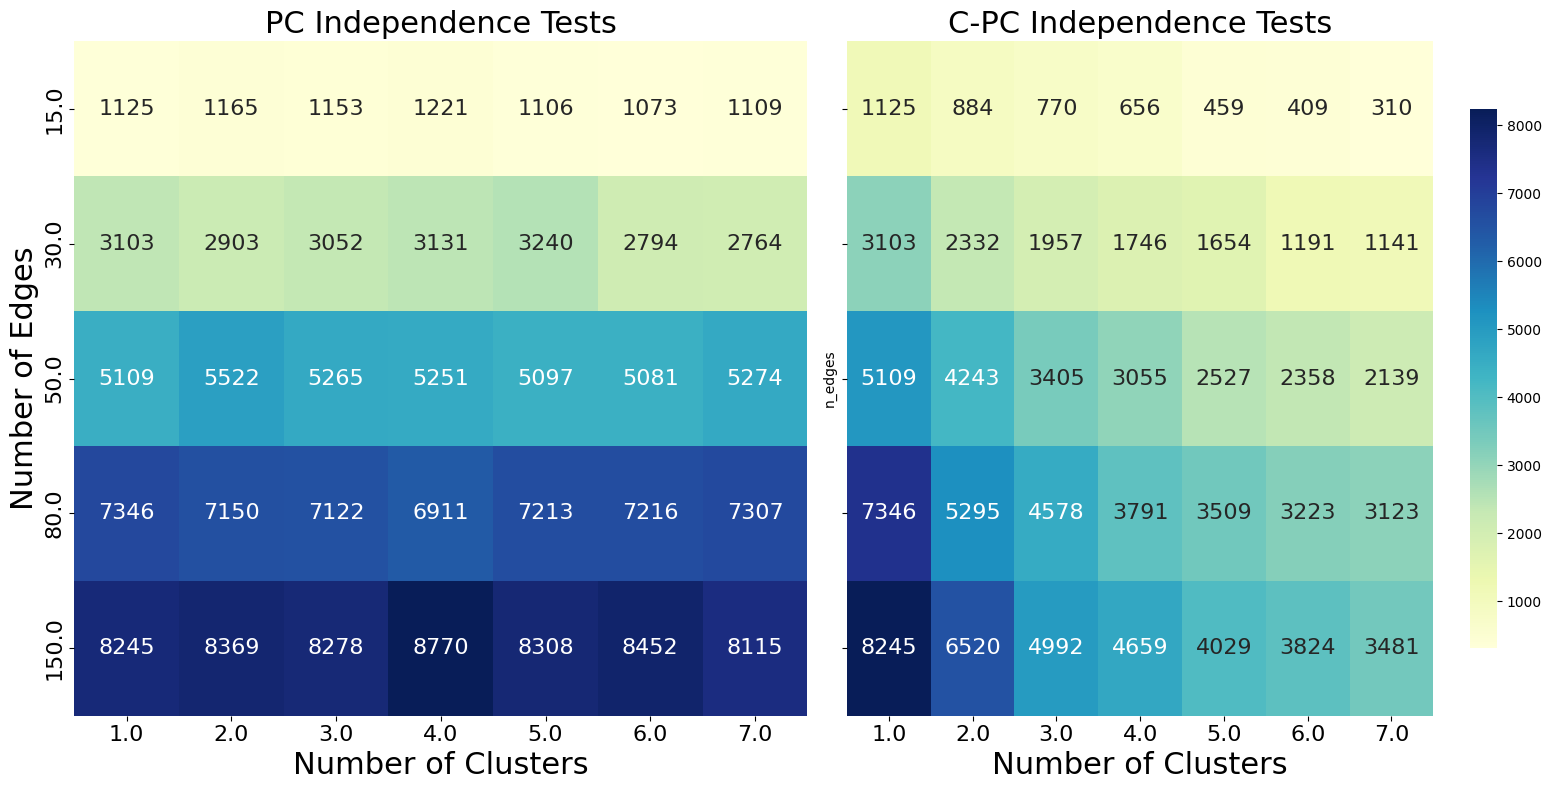

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by and calculate the mean for all metrics
grouped_data = data_all.groupby(['n_edges', 'n_clusters'])[indep_test_metrics].mean().reset_index()

# Separate metrics: Adjust these based on how you distinguish "base" and "C-PC" metrics
base_metric = 'Base indep tests'    # Replace with your base test metric name
cpc_metric = 'C-PC indep tests'     # Replace with your C-PC test metric name

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Heatmap for Base Independence Tests
heatmap_data_base = grouped_data.pivot(index='n_edges', columns='n_clusters', values=base_metric)
cbar = sns.heatmap(heatmap_data_base, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[0], cbar=False, \
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 16})
axes[0].set_title("PC Independence Tests", fontsize=22)
axes[0].set_xlabel("Number of Clusters", fontsize=22)
axes[0].set_ylabel("Number of Edges", fontsize=22)
axes[0].tick_params(axis='x', labelsize=16) 
axes[0].tick_params(axis='y', labelsize=16)

# Heatmap for C-PC Independence Tests
heatmap_data_cpc = grouped_data.pivot(index='n_edges', columns='n_clusters', values=cpc_metric)
sns.heatmap(heatmap_data_cpc, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[1], cbar=True, \
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 16})
axes[1].set_title("C-PC Independence Tests", fontsize=22)
axes[1].set_xlabel("Number of Clusters", fontsize=22)
axes[1].tick_params(axis='x', labelsize=16) 
axes[1].tick_params(axis='y', labelsize=16)
# cbar.ax.tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()
